## Things to know about pandas and proper verbiage
- The DataFrame is a **tabular data structure** with labeled rows and columns
- Indexes in pandas are tabeled lists of labels that make looks efficient
- Pandas is aware of the data types in the columns; also, null and `NaN` values.
- DataFrame essential analysis tools:

```python
type(df)
df.shape
df.columns
type(df.columns)
df.index
type(df.index)

# Pass the number of rows from the top of a Dataframe.
df.head()

# Pass the number of rows from the top of a Dataframe.
df.tail()

df.info()
# The kind of index,
# The column labels,
# The number of rows and columns,
# The number of null values per column,
# And the data type of each column.
```

- Slicing for rows

```python
# Row references for example only.
# To call the first five rows of a DataFrame.
df.iloc[:5,:]

# To call the last five rows of a DataFrame.
# Remembering that the last colon is the stride.
df.iloc[-5:,:]

# Assigning scalar value to column slices
# broadcasts the value to each row.
# The slice in this example reads, 
# 'every third row in the last column.'
import numpy as np
df.iloc[::3, -1] = np.nan

# Extracting a single column as a pandas series:
col_series = df['col_label']
type(col_series)
# output: pandas.core.series.Series
# The new series will gain its own name attritude.

# Extracting the values from a pandas series:
series_val = col_series.values
```

## DataFrames from Files
- `pd.read_csv(filepath, header=None)` Setting the header `header` keyword entry to `None` tells pandas to ignore the first row as labels. *If you pass an integer (**zero indexed**), pandas assumes that the line number that corresponds with the entry is where the labels exist and the data continues after.*
- The keyword argument `names` allows us to pass a list of column headers, `names=col_names`.
- The keyword argument `na_values` allows us to specify a null value entry, `na_values='none'` is an example. (*these values will be converted to `NaN` or 'Not a Number'*)
    - We can specify multiple null value expressions by passing a dictionary to na_values, `na_values={'col_header':['none']}`
- The keyword argument `parse_dates` allows us to read datetime data from our csv, `parse_dates=[[0, 1, 2]]` is an example if the year, month, and day are separated by columns.


### Writing files
```python
out_csv = 'filename.csv'
new_df.to_csv(out_csv)
out_tsv = 'filename.tsv'
new_df.to_csv(out_tsv, sep='\t')
out_xlsx = 'filename.xlsx'
new_df.to_excel(out_xlsx)
```


In [5]:
import numpy as np
import pandas as pd

pop = pd.read_csv('population.csv', index_col=0)

pop.head()

,Total Population
Year,
1960,3.030000e+09
1970,3.680000e+09
1980,4.440000e+09
1990,5.280000e+09
2000,6.120000e+09


In [6]:
# Create array of DataFrame values: np_vals
np_vals = pop.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(pop)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'pop', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
pop has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Building DataFrames
- `pd.read_csv()` will take a csv and generate a DataFrame.
- Pandas will take a dictionary with list values and generate a DataFrame.
- We can also construct DataFrames from lists in this way:

```python
import pandas as pd
list_1 = [data, data1]
list_2 = [name, name1]
list_3 = [place, place1]
list_4 = [count, count1]

list_labels = ['list one', 'list two', 'list three', 'list four']
list_cols = [list_1, list_2, list_3, list_4]      # list of lists

zipped = list(zip(list_labels, list_cols))

data = dict(zipped)

df = pd.DataFrame(data)
```

##### Broadcasting
```python
df['list five'] = 0
# This will broadcast the value 0 into a new column, list five.
```

- We can pass lists to update `df.columns` and `df.index` as long as they are of suitable length for the DataFrame.

In [7]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [9]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [11]:
billboard = pd.read_csv('billboard.csv', index_col=0)
print(billboard)

      a                  b                    c   d
0  1980            Blondie               Call Me  6
1  1981  Chistorpher Cross         Arthurs Theme  3
2  1982          Joan Jett  I Love Rock and Roll  7


In [12]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
billboard.columns = list_labels

In [13]:
print(billboard)

   year             artist                  song  chart weeks
0  1980            Blondie               Call Me            6
1  1981  Chistorpher Cross         Arthurs Theme            3
2  1982          Joan Jett  I Love Rock and Roll            7


In [14]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

In [16]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


In [20]:
# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)
print(df1.shape, df2.shape)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09
(6, 2) (6, 2)


In [25]:
# Read the raw file as-is: df1
df1 = pd.read_csv('messy_stock_data.tsv')

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('tmp_clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

## Plotting with pandas
```python
my_var = df['col_ref'].values        

# Column reference results in pandas series 
# and the .values method results in a numpy array.
```

**`plt.plot` can plot lists, numpy arrays, pandas series, etc.**

The most efficient and formatted option is to use the **`pd_series.plot()`** function.

There is also a `plot()` function for a pandas DataFrame. 

To remedy significantly different scales in the column data, use the `yscale()` function and pass the argument `'log'`.

- An example plot from two DataFrame columns:

```python
aapl['open'].plot(color='b', style='.-', legend=True)
aapl['close'].plot(color='r', style='.', legend=True)
plt.axis(('2001', '2002', 0, 100))
plt.show()
```

In [35]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col=3, parse_dates=[3], names=['temperature (°F)', 'dewpoint (°F)', 'pressure (atm)', 'date'], header=0)
print(df.head())
df.info()

                     temperature (°F)  dewpoint (°F)  pressure (atm)
date                                                                
2010-01-01 00:00:00              46.2           37.5             1.0
2010-01-01 01:00:00              44.6           37.1             1.0
2010-01-01 02:00:00              44.1           36.9             1.0
2010-01-01 03:00:00              43.8           36.9             1.0
2010-01-01 04:00:00              43.5           36.8             1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
temperature (°F)    8759 non-null float64
dewpoint (°F)       8759 non-null float64
pressure (atm)      8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


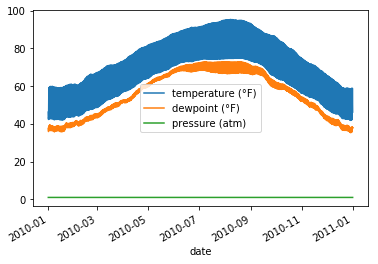

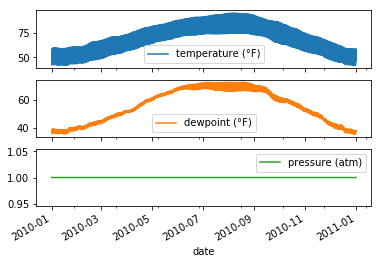

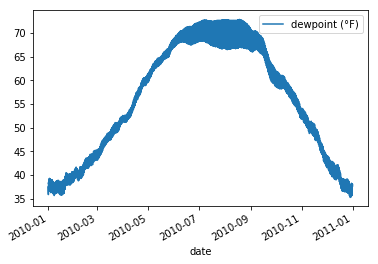

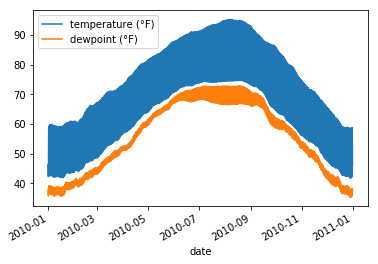

In [37]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['dewpoint (°F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['temperature (°F)','dewpoint (°F)']
df[column_list2].plot()
plt.show()

## Eploratory Data Analysis **(EDA)**
### Visual EDA

- Histogram options:
    - `bins(int)`: number of intervals or bins
    - `range(tuple)`: extrema of bins (minimum and maximum)
    - `normed(boolean)`: **superseded by `density(boolean)`** whether to normalize to one
    - `cumulative (boolean)`: compute Cumulative Distribution Function (CDF)
        - Achieved by adding up the areas of the rectangles under a normalized histogram.
        - Used to compute the probability of observing a value in a given range.
    - Be aware of varied syntax around histograms:
        - `df.plot(kind='hist')`
        - `df.plt.hist()`
        - `df.hist()`        

In [77]:
df = pd.read_csv('stocks_data.csv', index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null object
AAPL     12 non-null float64
GOOG     12 non-null float64
IBM      12 non-null float64
dtypes: float64(3), object(1)
memory usage: 480.0+ bytes
None


,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994


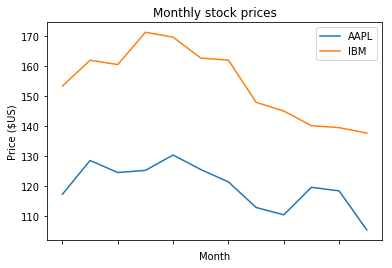

In [76]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

In [79]:
sizes = [51.12044694, 56.78387977, 49.15557238, 49.06977358, 49.52823321, 78.4595872, 78.93021696, 77.41479205, 81.52541106, 61.71459825, 52.85646225, 54.23007578, 58.89427963, 39.65137852, 23.42587473, 33.41639502, 32.03903011, 27.8650165, 18.88972581, 14.0196956, 29.72619722, 24.58549713, 23.48516821, 20.77938954, 29.19459189, 88.67676838, 79.72987328, 79.94866084, 93.23005042, 18.88972581, 21.34122243, 20.6679223, 28.88670381, 49.24144612, 46.14174741, 45.39631334, 45.01218186, 73.76057586, 82.96880195, 71.84547684, 69.85320595, 102.22421043, 93.78252358, 110.0, 36.52889673, 24.14234281, 44.84805372, 41.02504618, 20.51976563, 18.765772, 17.9095202, 17.75442285, 13.08832041, 10.83266174, 14.00441945, 15.91328975, 21.60597587, 18.8188451, 21.15311208, 24.14234281, 20.63083317, 76.05635059, 80.05816704, 71.18975117, 70.98330444, 56.13992036, 89.36985382, 84.38736544, 82.6716892, 81.4149056, 22.60363518, 63.06844313, 69.92143863, 76.76982089, 69.2066568, 35.81711267, 26.25184749, 36.94940537, 19.95069229, 23.88237331, 21.79608472, 26.1474042, 19.49759118, 18.36136808, 69.98970461, 56.13992036, 66.21810474, 68.02351436, 59.39644014, 102.10046481, 82.96880195, 79.25686195, 74.74521151, 93.34830013, 102.05923292, 60.7883734, 40.55589449, 44.7388015, 36.11079464, 37.9986264, 35.11233175, 15.83199594, 103.96451839, 100.21241654, 90.18186347, 84.27493641, 32.38645967, 21.62494928, 24.00218436, 23.56434276, 18.78345471, 22.21725537, 25.44271071, 21.36007926, 69.37650986, 76.19877818, 14.51292942, 19.38962134, 27.75740889, 34.24717407, 48.10262495, 29.459795, 32.80584831, 55.89556844, 40.06360581, 35.03982309, 46.33599903, 15.83199594, 25.01226779, 14.03498009, 26.90404245, 59.52231336, 54.92349014, 54.35035315, 71.39649768, 91.93424995, 82.70879915, 89.56285636, 75.45251972, 20.50128352, 16.04379287, 22.02531454, 11.32159874, 16.70430249, 18.80114574, 18.50153068, 21.00322336, 25.79385418, 23.80266582, 16.65430211, 44.35746794, 49.815853, 49.04119063, 41.52318884, 90.72524338, 82.07906251, 84.23747672, 90.29816462, 63.55551901, 63.23059357, 57.92740995, 59.64831981, 38.45278922, 43.19643409, 41.81296121, 19.62393488, 28.99647648, 35.35456858, 27.97283229, 30.39744886, 20.57526193, 26.96758278, 37.07354237, 15.62160631, 42.92863291, 30.21771564, 36.40567571, 36.11079464, 29.70395123, 13.41514444, 25.27829944, 20.51976563, 27.54281821, 21.17188565, 20.18836167, 73.97101962, 73.09614831, 65.35749368, 73.97101962, 43.51889468, 46.80945169, 37.77255674, 39.6256851, 17.24230306, 19.49759118, 15.62160631, 13.41514444, 55.49963323, 53.18333207, 55.31736854, 42.44868923, 13.86730874, 16.48817545, 19.33574884, 27.3931002, 41.31307817, 64.63368105, 44.52069676, 35.74387954, 60.75655952, 79.87569835, 68.46177648, 62.35745431, 58.70651902, 17.41217694, 19.33574884, 13.86730874, 22.02531454, 15.75091031, 62.68013142, 68.63071356, 71.36201911, 76.80558184, 51.58836621, 48.84134317, 54.86301837, 51.73502816, 74.14661842, 72.22648148, 77.88228247, 78.24284811, 15.67003285, 31.25845963, 21.36007926, 31.60164234, 17.51450098, 17.92679488, 16.40542438, 19.96892459, 32.99310928, 28.14577056, 30.80379718, 16.40542438, 13.48998471, 16.40542438, 17.84050478, 13.48998471, 47.1451025, 58.08281541, 53.06435374, 52.02897659, 41.44433489, 36.60292926, 30.80379718, 48.98404972, 42.90189859, 47.56635225, 39.24128299, 54.56115914, 48.41447259, 48.84134317, 49.41341845, 42.76835191, 69.30854366, 19.33574884, 27.28640858, 22.02531454, 20.70504474, 26.33555201, 31.37264569, 33.93740821, 24.08222494, 33.34566004, 41.05118927, 32.52595611, 48.41447259, 16.48817545, 18.97851406, 43.84255439, 37.22278157, 34.77459916, 44.38465193, 47.00510227, 61.39441929, 57.77221268, 65.12675249, 61.07507305, 79.14790534, 68.42801405, 54.10993164, 64.63368105, 15.42864956, 16.24054679, 15.26876826, 29.68171358, 51.88189829, 63.32798377, 42.36896092, 48.6988448, 20.15170555, 19.24612787, 16.98905358, 18.88972581, 29.68171358, 28.03762169, 30.35246559, 27.20120517, 19.13885751, 16.12562794, 18.71277385, 16.9722369, 29.85984799, 34.29495526, 37.54716158, 47.59450219, 19.93246832, 30.60028577, 26.90404245, 24.66650366, 21.36007926, 18.5366546, 32.64243213, 18.5366546, 18.09999962, 22.70075058, 36.23351603, 43.97776651, 14.24983724, 19.15671509, 14.17291518, 35.25757392, 24.38356372, 26.02234705, 21.83420642, 25.81458463, 28.90864169, 28.58044785, 30.91715052, 23.6833544, 12.82391671, 14.63757021, 12.89709155, 17.75442285, 16.24054679, 17.49742615, 16.40542438, 20.42743834, 17.41217694, 23.58415722, 19.96892459, 20.33531923, 22.99334585, 28.47146626, 28.90864169, 43.43816712, 41.57579979, 35.01567018, 35.74387954, 48.5565546, 57.77221268, 38.98605581, 49.98882458, 28.25412762, 29.01845599, 23.88237331, 27.60710798, 26.54539622, 31.14448175, 34.17556473, 16.3228815, 17.0732619, 16.15842026, 18.80114574, 18.80114574, 19.42557798, 20.2434083, 20.98452475, 16.07650192, 16.07650192, 16.57113469, 36.11079464, 37.84783835, 27.82194848, 33.46359332, 29.5706502, 23.38638738, 36.23351603, 32.40968826, 18.88972581, 21.92965639, 28.68963762, 30.80379718]
sizes = np.array(sizes)
# This array contains the normalized 'weight' of each automobile in the dataset.

type(sizes)

numpy.ndarray

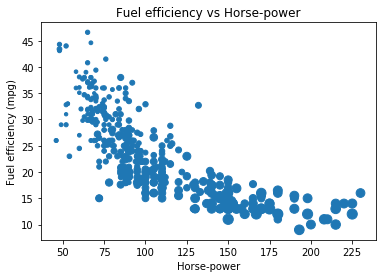

In [81]:
df = pd.read_csv('auto-mpg.csv')

# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)
# s keyword argument to provide the radius of each circle to plot in pixels.
#
# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()